In [322]:
# import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

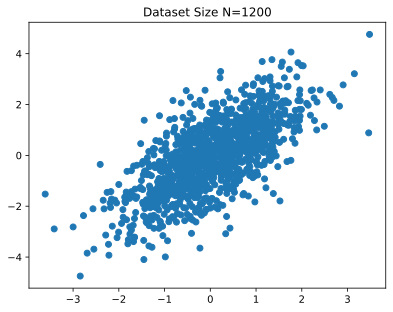

In [323]:
# create synthetic data

N = 300 # adjusted to 300 to predict more and loss curve becomes smoother, and predictions align better with real data.
N = 1200
noise_strength = 0.01 # lesser noise much clear pattern
x = torch.randn(N,1) #torch function for random number generator
y = x + torch.randn(N,1) # torch.randn(N,1) is an added noise

# and plot
plt.plot(x,y,'o')
plt.title(f'Dataset Size N={N}')
plt.show()

In [324]:
# build model
ANN_model = nn.Sequential(
    nn.Linear(1,1),  # input layer: (1,1) first 1 is the number of features going in, second 1 is the number of output of hidden layer
    nn.ReLU(),       # activation function
    nn.Linear(1,1)   # output layer: (1,1) first 1 is the output going out of hidden layer, second 1 is the result after the output layer
    )

ANN_model #model summary

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [325]:
# learning rate
learningRate = 0.006 # changed for experiment

# loss function
lossfun = nn.MSELoss()

# optimization
optimizer = torch.optim.SGD(ANN_model.parameters(),lr=learningRate)

In [326]:
# train the model
numepochs = 500
losses = torch.zeros(numepochs) # instantiate the losses to zero


## for loop to run on each epoch
for epochi in range(numepochs):

  # forward pass
  yHat = ANN_model(x)

  # compute loss
  loss = lossfun(yHat,y)
  losses[epochi] = loss

  # back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

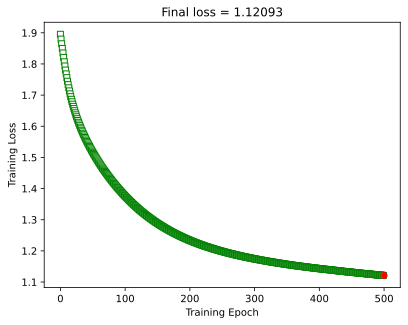

In [327]:
# create predictions for every values of x
predictions = ANN_model(x)

# final loss (MSE)
testloss = (predictions-y).pow(2).mean() #Mean Squared Error

plt.plot(losses.detach(),'gs',markerfacecolor='w',linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Training Epoch')
plt.ylabel('Training Loss')
plt.title('Final loss = %g' %testloss.item())
plt.show()

In [328]:
testloss.item()

1.1209288835525513

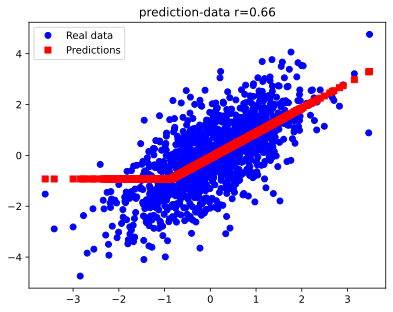

In [329]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

# Experiments

1. Vary the value of N and rerun the codes, contrast and compare the result.

2. Vary the value of the noise torch.randn(N,1), try multiplying it with a constant, try dividing it with a constant,c. How does the result differ? How does the noise affect the performance of the model?

3. Try experimenting with the learning rate, how does learning rate affect the model?
4. Use N>999, split the data into training and testing, train a model and determine its performance on the test data.

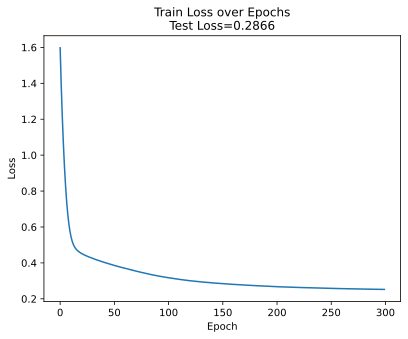

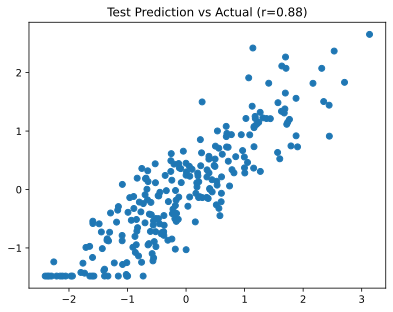

In [330]:
# Large dataset number 4
N = 1200
x = torch.randn(N,1)
y = x + 0.5*torch.randn(N,1)

# Split into train/test
train_idx = int(N*0.8)
xtrain = x[:train_idx]
ytrain = y[:train_idx]
xtest = x[train_idx:]
ytest = y[train_idx:]

# Define model again
model = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

lossfun = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

# Training loop
numepochs = 300
trainloss = []
for i in range(numepochs):
    yHat = model(xtrain)
    loss = lossfun(yHat, ytrain)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    trainloss.append(loss.item())

# Test performance
with torch.no_grad():
    ypred = model(xtest)
    testloss = lossfun(ypred, ytest)

plt.plot(trainloss)
plt.title(f'Train Loss over Epochs\nTest Loss={testloss.item():.4f}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(ytest, ypred, 'o')
plt.title(f'Test Prediction vs Actual (r={np.corrcoef(ytest.T, ypred.T)[0,1]:.2f})')
plt.show()
